In [1]:
# This tutorial assumes that you have dowloaded and installed the necessary dependencies.

import torch
from data_utils import generate_input_img, extract_trimesh
from model import VNet
from IPython.display import Image
from torchvision.transforms import ToPILImage
from matplotlib.pyplot import imshow

In [2]:
# Create Model and Load the pre-trained chekcpoint
model_3d = VNet()
model_3d.load_state_dict(torch.load("distilled_model.torch"))
model_3d.eval();

In [3]:
# Load and process image for inference
rgb_img_path = "./demo_data/rgb_3.png"
mask_img_path = "./demo_data/mask_3.png"
inp_img = generate_input_img(
    rgb_img_path,
    mask_img_path,
)

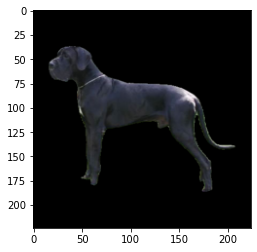

In [4]:
# Visualize pre-processed input image given to the model
imshow(inp_img.squeeze(0).permute(1,2,0).cpu().numpy())

In [5]:
%%capture --no-display
    
# Extract and visualize mesh for the given input image
out_mesh = extract_trimesh(model_3d, inp_img, "cuda")

# Click and drag to pan the output mesh
out_mesh.show()
